In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs

In [4]:
sbs.set()

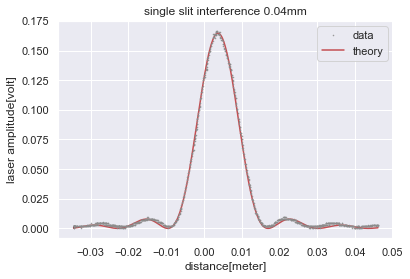

A:54.68130697369036
z:0.8396455694334474
d:4.002825785044088e-05
wl:6.334307744399825e-07
offset:0.003722580948660049
R^2:0.9985257914714079


In [5]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
A=50
data=es.read('exp1125/original parameters/single slit/0.04','sweep2.txt')
s,f=[200,-200]
r,c=[320,1314/2]
r,c=[(f-s)/2,(s+f)/2]
r,c=[-0.5,-0.5]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0      ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 ( np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.04mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))

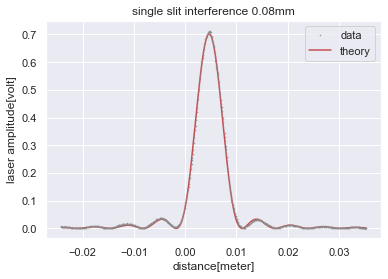

A:56.37180372558
z:0.8136285639577565
d:8.005952312781121e-05
wl:6.322718665696176e-07
offset:0.004685560690843836
R^2:0.9991010333093735
note: can be made to converge better on expected z value


In [6]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=8.0e-5
A=55
data=es.read('exp1125/original parameters/single slit/0.08','sweep1.txt')
s,f=[0,-80]
r,c=[320,1314/2]
r,c=[-0.5,-0.5]
r,c=[(f-s)/2,(s+f)/2]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((50     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (60     ,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.08mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better on expected z value')

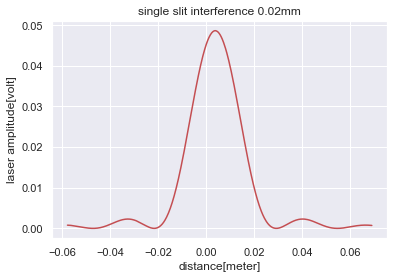

A:62.03551657443548
z:0.8045062899559225
d:1.998001819631764e-05
wl:6.330677643837219e-07
offset:0.0038472807120333513
R^2:0.9856006433935065
note: can be made to converge better on expected z value


In [7]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=2.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.02','sweep2.txt')
s,f=[50,-80]
r,c=[320,1314/2]
r,c=[-0.5,-0.5]
r,c=[(f-s)/2,(s+f)/2]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.title('single slit interference 0.02mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better on expected z value')

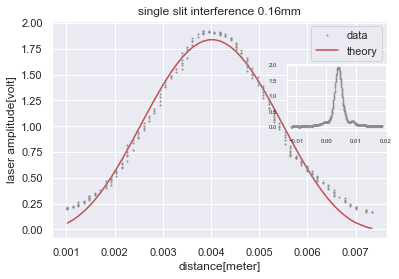

A:41.03445615724578
z:0.9045048033227776
d:0.0001601095932597945
wl:6.321730646763211e-07
offset:0.00401787560777939
R^2:0.984414811863369
note: can be made to converge better using a model that integrates over the iris width


In [8]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=16.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.16','sweep1.txt')
r,c=[-0.5,-0.5]
s,f=[0,-1]
r,c=[(f-s)/2,(s+f)/2]
r,c=[120,2120]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.16mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
r,c=[520,2120]
rect = [0.7,0.5,0.3,0.3]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
ax1 = es.add_subplot_minimap(ax,rect)
ax1.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better using a model that integrates over the iris width')


NameError: name 'p0' is not defined

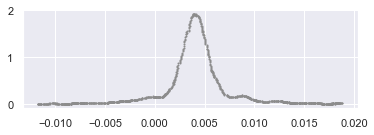

In [9]:
pname=['A', 'z', 'd', 'wl', 's', 'offset']

z=0.855
wl=(6.328*(10**(-7)))
d=16.0e-5
A=50
s=0.5

plt.subplot(211)
plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model_with_integration,xdata,ydata,p0,bounds=bounds)
plt.plot(xdata,es.single_slit_model_with_integration(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.subplot(212)
plt.plot(xdata,ydata-es.single_slit_model_with_integration(xdata,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
plt.ylim()
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model_with_integration,popt)))

In [ ]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=16.0e-5
L=25.0e-5
A=20
data=es.read('exp1125/original parameters/double slit/0.08w 0.25s','sweep1.txt')
r,c=[-0.5,-0.5]
s,f=[0,-1]
r,c=[(f-s)/2,(s+f)/2]
r,c=[300,2080]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.double_slit_model,xdata,ydata,[A, z, d, wl, L ,es.offset],
                         bounds=((0     ,z-0.1*z,d-0.1*d,wl-0.1*wl,L-0.1*L,-np.inf),
                                 (np.inf,z+0.1*z,d+0.1*d,wl+0.1*wl,L+0.1*L,np.inf)))
plt.plot(xdata,es.double_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
# plt.title('single slit interference 0.16mm')
# plt.xlabel('distance[meter]')
# plt.ylabel('laser amplitude[volt]')
plt.show()
# for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.double_slit_model,popt)))

In [ ]:
from scipy.special import erf, erfi, sici
def experamental(x, A, z, d, wl, s, offset):
    return A * ((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2)+(2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi))

def experamental2(x, A, z, d, wl, s, offset):
    return A*((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2))*(2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi)

def experamental3(x, A, B, z, d, wl, s, offset):
    return (A*((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2))+B*((2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi)))


pname=['A', 'z', 'd', 'wl', 's', 'offset']
pname3=['A', 'B', 'z', 'd', 'wl', 's', 'offset']

# A=2000*8
# z=0.855
# d=0.0001601095932597945
# wl=6.321730646763211e-07
# offset=-0.01706663013764606

z=0.855
wl=(6.328*(10**(-7)))
d=16.0e-5
A=50
B=1
s=0.5
bounds=((0     ,z-0.01*z,d-0.001*d,wl-wl*0.001,0,-np.inf),
        (np.inf,z+0.01*z,d+0.001*d,wl+wl*0.001,1,np.inf))
bounds3=((0    ,0,z-0.01*z,d-0.001*d,wl-wl*0.001,0,-np.inf),
        (np.inf,np.inf,z+0.01*z,d+0.001*d,wl+wl*0.001,1,np.inf))
p0=[A, z, d, wl, s, es.offset]
p03=[A, B, z, d, wl, s, es.offset]
data=es.read('exp1125/original parameters/single slit/0.16','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
def expfit(experamental,bounds,p0,pname):
    plt.subplot(211)
    plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
    popt, pcov=fit.curve_fit(experamental,xdata,ydata,p0,bounds=bounds)
    plt.plot(xdata,experamental(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
    plt.subplot(212)
    plt.plot(xdata,ydata-experamental(xdata,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
    plt.ylim()
    plt.show()
    for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
    print('R^2:'+str(es.Rsquared(xdata,ydata,experamental,popt)))
    print('-----------------------')
expfit(experamental,bounds,p0,pname)
expfit(experamental3,bounds3,p03,pname3)

In [ ]:
def single_slit_model(x, A, z, d, wl, offset):
    return A * (2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2)
z=0.84
wl=(6.328*(10**(-7)))
wl2=((6.328*1.9)*(10**(-7)))
d=16.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.16','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata)
plt.subplots(5,5)
for i in range(1,9):
    plt.subplot(330+i)
    plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[i]*wl, 0]))
plt.show()



plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[5]*wl, 0]))







np.linspace(1,1.5,9)




In [ ]:
def single_slit_model(x, A, z, d, wl, offset):
    return A * (2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2)
z=0.84
wl=(6.328*(10**(-7)))
wl2=((6.328*1.9)*(10**(-7)))
d=16.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.16','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata)
plt.subplots(5,5)
for i in range(1,9):
    plt.subplot(330+i)
    plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[i]*wl, 0]))
plt.show()



plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[5]*wl, 0]))







np.linspace(1,1.5,9)




In [ ]:
from scipy.special import erf, erfi, sici
def experamental(x, A, z, d, wl, s, offset):
    return A * ((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2)+(2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi))

def experamental2(x, A, z, d, wl, s, offset):
    return A*((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2))*(2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi)

def experamental3(x, A, B, z, d, wl, s, offset):
    return (A*((2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2))+B*((2 * z * (-(z - z * np.cos((d * (2 * np.pi / wl) * (s - (x-offset))) / z) + d * (2 * np.pi / wl) * (s - (x-offset)) * sici((d * (2 * np.pi / wl) * (-s + (x-offset))) / z)[0]) / (
                2. * (s - (x-offset)) * z) + ((-1 + np.cos((d * (2 * np.pi / wl) * (s + (x-offset))) / z)) / (s + (x-offset)) + (
                d * (2 * np.pi / wl) * sici((d * (2 * np.pi / wl) * (s + (x-offset))) / z)[0]) / z) / 2.)) / ((2 * np.pi / wl) * np.pi)))


pname=['A', 'z', 'd', 'wl', 's', 'offset']
pname3=['A', 'B', 'z', 'd', 'wl', 's', 'offset']

# A=2000*8
# z=0.855
# d=0.0001601095932597945
# wl=6.321730646763211e-07
# offset=-0.01706663013764606

z=0.855
wl=(6.328*(10**(-7)))
d=16.0e-5
A=50
B=1
s=0.5
bounds=((0     ,z-0.01*z,d-0.001*d,wl-wl*0.001,0,-np.inf),
        (np.inf,z+0.01*z,d+0.001*d,wl+wl*0.001,1,np.inf))
bounds3=((0    ,0,z-0.01*z,d-0.001*d,wl-wl*0.001,0,-np.inf),
        (np.inf,np.inf,z+0.01*z,d+0.001*d,wl+wl*0.001,1,np.inf))
p0=[A, z, d, wl, s, es.offset]
p03=[A, B, z, d, wl, s, es.offset]
data=es.read('exp1125/original parameters/single slit/0.16','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
def expfit(experamental,bounds,p0,pname):
    plt.subplot(211)
    plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
    popt, pcov=fit.curve_fit(experamental,xdata,ydata,p0,bounds=bounds)
    plt.plot(xdata,experamental(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
    plt.subplot(212)
    plt.plot(xdata,ydata-experamental(xdata,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
    plt.ylim()
    plt.show()
    for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
    print('R^2:'+str(es.Rsquared(xdata,ydata,experamental,popt)))
    print('-----------------------')
expfit(experamental,bounds,p0,pname)
expfit(experamental3,bounds3,p03,pname3)

In [ ]:
def single_slit_model(x, A, z, d, wl, offset):
    return A * (2 * z * np.sin((d * (2 * np.pi / wl) * (x - offset)) / (2 * z)) ** 2) / (
            (2 * np.pi / wl) * np.pi * (x - offset) ** 2)
z=0.84
wl=(6.328*(10**(-7)))
wl2=((6.328*1.9)*(10**(-7)))
d=16.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.16','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata)
plt.subplots(5,5)
for i in range(1,9):
    plt.subplot(330+i)
    plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[i]*wl, 0]))
plt.show()



plt.plot(xdata,single_slit_model(xdata,*[A, z, d, wl, 0])+single_slit_model(xdata,*[A, z, d, wl+np.linspace(1,1.5,9)[5]*wl, 0]))







np.linspace(1,1.5,9)


